In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Step -1 Import libraries and load data.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Load the data
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Step-2 Basic Data Exploration

In [2]:
# Shape and info
print("Shape:", df.shape)
df.info()

Shape: (4340, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [3]:
# Summary stats
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [4]:
# Check missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# Step 3: Data Cleaning and Preprocessing

In [5]:
# Renaming columns for consistency
df.columns = [col.lower().replace(" ", "_") for col in df.columns]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Handle Categorical Columns
# Check unique values
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    print(f"{col}: {df[col].unique()}")

fuel: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: ['Manual' 'Automatic']
owner: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


# Step 4: Exploratory Data Analysis (EDA)

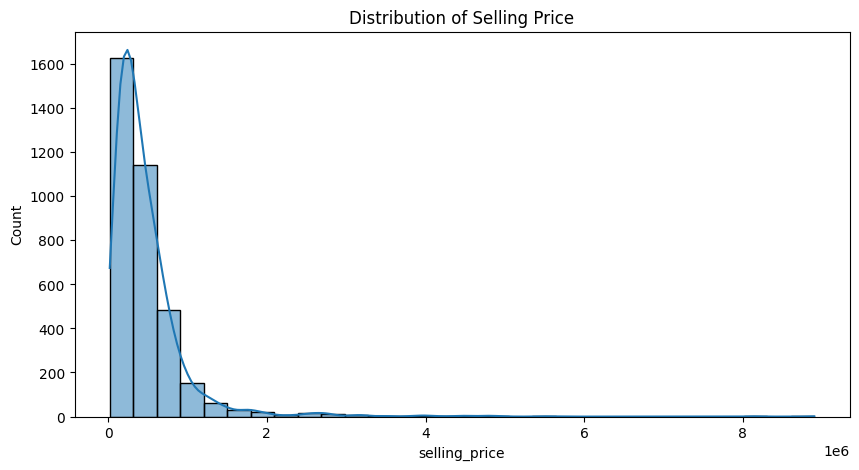

In [9]:
# Distribution of Selling Price
plt.figure(figsize=(10, 5))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.show()

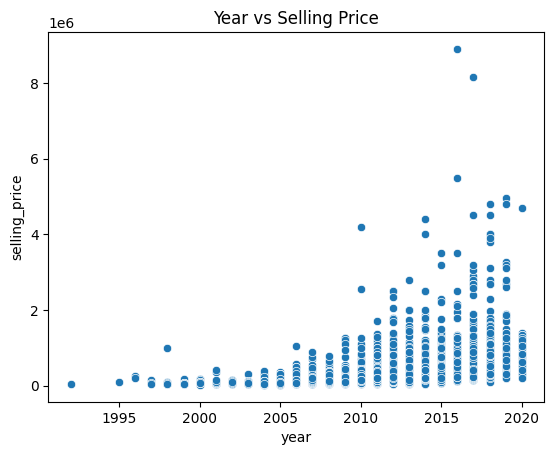

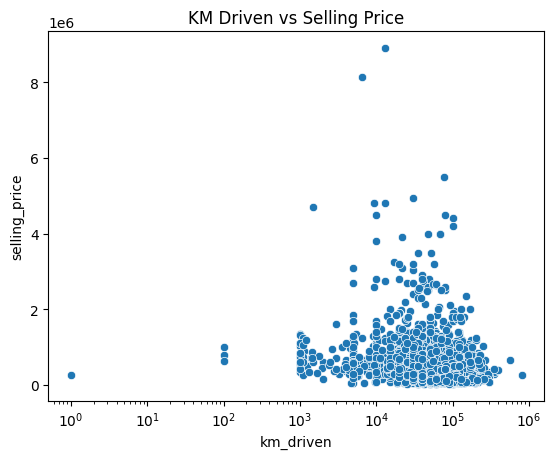

In [10]:
# Price vs Year, KM Driven
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.show()

sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title('KM Driven vs Selling Price')
plt.xscale('log')
plt.show()

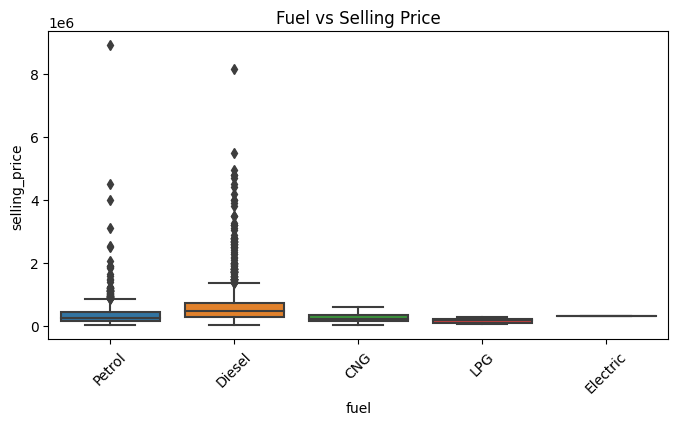

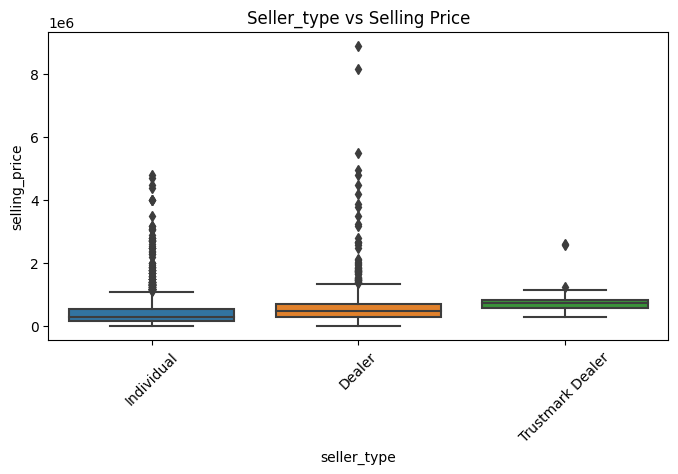

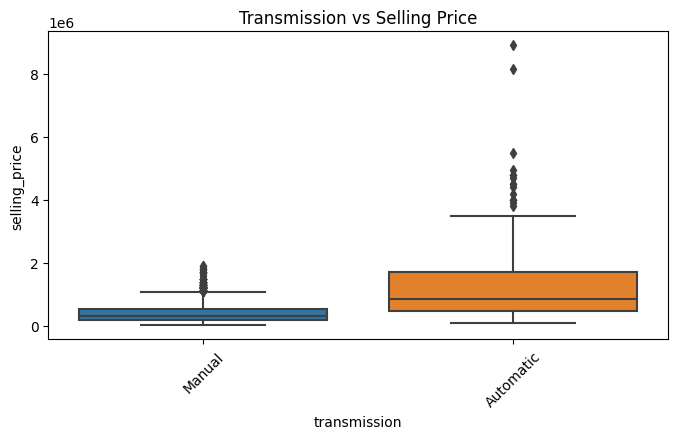

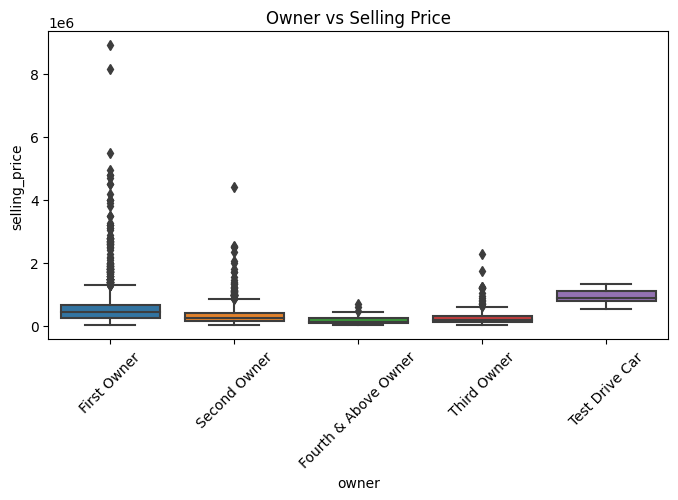

In [11]:
# Categorical Features vs Price
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, y='selling_price')
    plt.title(f"{col.capitalize()} vs Selling Price")
    plt.xticks(rotation=45)
    plt.show()

# Step 5: Feature Engineering

In [15]:
# Extract Brand Name
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])
df.drop('name', axis=1, inplace=True)

KeyError: 'name'

In [16]:
# Check the current state of your DataFrame
print(df.head())

   year  selling_price  km_driven    fuel seller_type transmission  \
0  2007          60000      70000  Petrol  Individual       Manual   
1  2007         135000      50000  Petrol  Individual       Manual   
2  2012         600000     100000  Diesel  Individual       Manual   
3  2017         250000      46000  Petrol  Individual       Manual   
4  2014         450000     141000  Diesel  Individual       Manual   

          owner    brand  
0   First Owner   Maruti  
1   First Owner   Maruti  
2   First Owner  Hyundai  
3   First Owner   Datsun  
4  Second Owner    Honda  


Brand column was created successfully. I was running extract brand name the second time , and that was causing error , since name columnn has already been dropped.

In [17]:
# Encode Categorical Features - to remove redundancy
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 6: Split Data for Training

In [18]:
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Baseline Model (Linear Regression)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 385606.0860979462
R² Score: 0.5384145989248196


Linear Regression is a simple baseline. The poor performance suggests the relationships in the data are not purely linear or that the data needs better preparation.

# Step 8: Residuals and Error Analysis

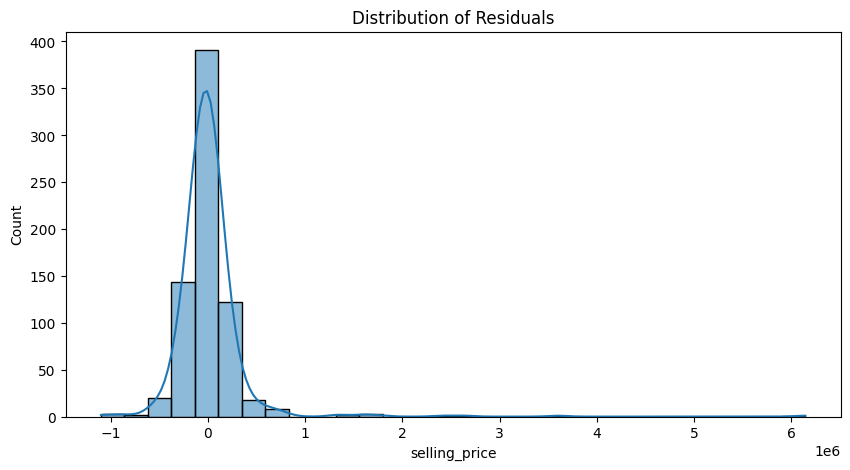

In [21]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.show()

# Step 9: Log-Transform the Target Variable 📈 and Re-Split with New Target

**Since the selling_price is heavily skewed (right-skewed), and linear models perform much better when the target variable has a more normal distribution.**

In [23]:
# Log-transform the selling_price (target variable)
import numpy as np

# Add a new column to keep original price for later inverse transformation
df_encoded['log_selling_price'] = np.log1p(df_encoded['selling_price'])


In [24]:
#Re-split with new target (log_selling_price)
X = df_encoded.drop(['selling_price', 'log_selling_price'], axis=1)
y = df_encoded['log_selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10 : Train and Evaluate Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_log = rf_model.predict(X_test)
y_pred_actual = np.expm1(y_pred_log)  # Inverse log1p transform
y_test_actual = np.expm1(y_test)

In [27]:
# Evaluate Random Forest Performance
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print("Random Forest RMSE:", rmse)
print("Random Forest R² Score:", r2)

Random Forest RMSE: 354893.3959992999
Random Forest R² Score: 0.6090149599066348


# Step 12: Advanced Feature Engineering 🛠️
 The high RMSE suggests that outliers or the way categorical features are handled might still be disproportionately affecting the model.

Let's move on to more advanced techniques to get a significant performance boost.

The brand and owner columns can be handled more effectively. One-hot encoding many brands creates a lot of sparse features, which can be inefficient. Let's group rare brands into an 'Other' category. Also, the owner column is ordinal (has a clear order), so we should encode it as such.

In [37]:
# Advanced Feature Engineering ---
# Re-load the original dataframe to ensure a clean slate
df_fe = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')
df_fe.drop_duplicates(inplace=True)

# Extract brand name and group rare brands
df_fe['brand'] = df_fe['name'].apply(lambda x: x.split(' ')[0])
brand_counts = df_fe['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 10].index
df_fe['brand'] = df_fe['brand'].replace(rare_brands, 'Other')

# Ordinal Encoding for the 'owner' column
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}
df_fe['owner_encoded'] = df_fe['owner'].map(owner_mapping)

# Drop original columns and apply log transform
df_fe = df_fe.drop(['name', 'owner'], axis=1)
df_fe['log_selling_price'] = np.log1p(df_fe['selling_price'])

# One-hot encode the remaining categorical features
df_processed = pd.get_dummies(df_fe, columns=['fuel', 'seller_type', 'transmission', 'brand'], drop_first=True)
print("Data after advanced feature engineering:")
df_processed.head()

Data after advanced feature engineering:


,year,selling_price,km_driven,owner_encoded,log_selling_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,...,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Nissan,brand_Other,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen
0,2007,60000,70000,1,11.002117,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
1,2007,135000,50000,1,11.813037,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
2,2012,600000,100000,1,13.304687,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2017,250000,46000,1,12.429220,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,2014,450000,141000,2,13.017005,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# Step 13: Train an XGBoost Model 🚀
XGBoost (Extreme Gradient Boosting) is a highly efficient and powerful algorithm that often provides state-of-the-art results on tabular data like this. It's generally more robust to outliers and complex interactions than Random Forest.

In [38]:
import xgboost as xgb
# --Split Data and **Convert Data Types** ---
X = df_processed.drop(['selling_price', 'log_selling_price'], axis=1)
y = df_processed['log_selling_price']

# ---Convert boolean columns to integers (1s and 0s) --- Since SHAP's underlying code requires all features to be explicitly integers or floats.
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Now, split the fully numeric dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train XGBoost and ---
print("Training XGBoost Model...")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
print("\nXGBoost Model Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual_xgb, y_pred_actual_xgb)))
print("R² Score:", r2_score(y_test_actual_xgb, y_pred_actual_xgb))

Training XGBoost Model...

XGBoost Model Performance:
RMSE: 404844.0180423654
R² Score: 0.4912086045856271


# Step 14: Visualize Feature Importance

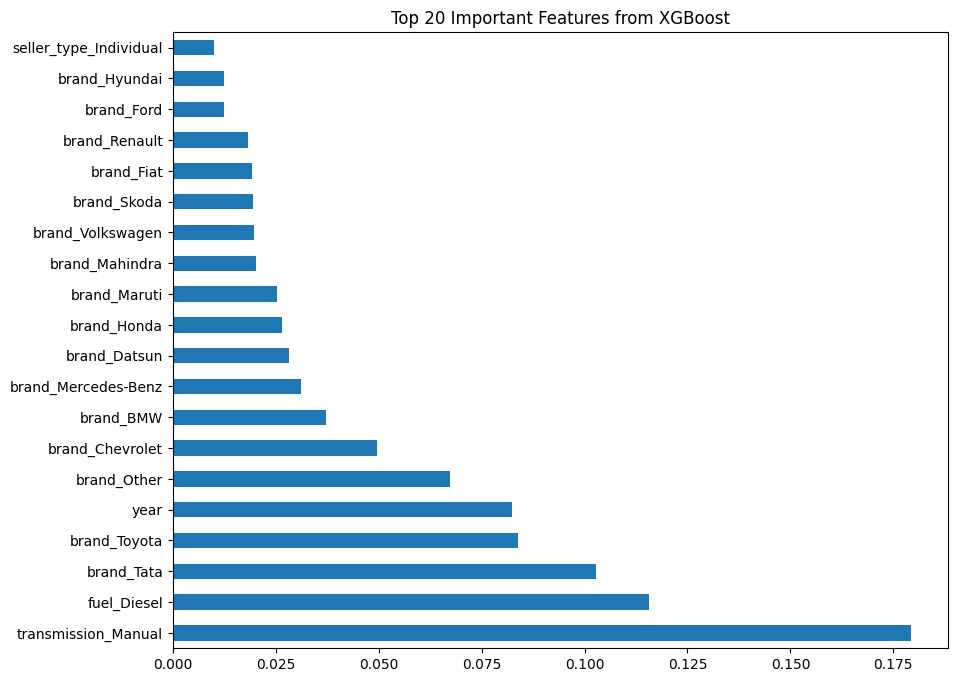

In [39]:
import matplotlib.pyplot as plt

importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Important Features from XGBoost')
plt.show()


# Step 15: SHAP Explanations


Running SHAP Explainer...
Displaying SHAP Beeswarm Plot:


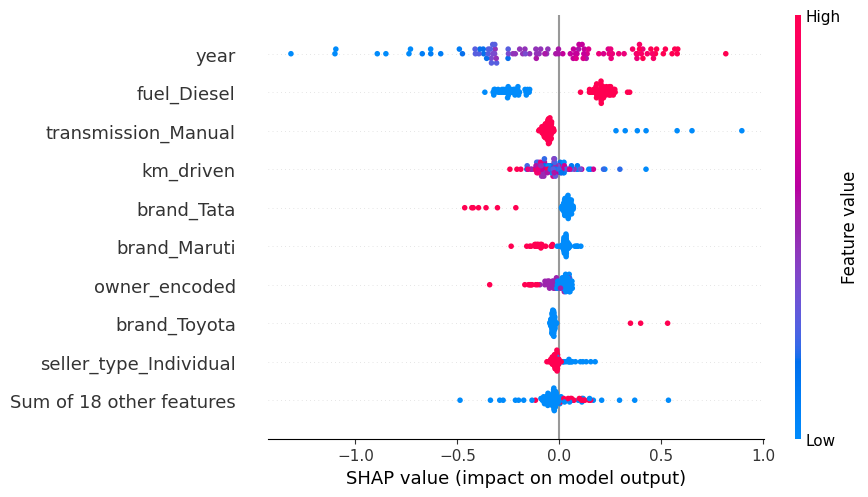

In [40]:
import shap

print("\nRunning SHAP Explainer...")
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test[:100])

print("Displaying SHAP Beeswarm Plot:")
shap.plots.beeswarm(shap_values)

# Step 16 : Evaluating and Comparing all three models (Linear Regression, Random Forest, XGBoost)

## Step 16.1: Setup & Advanced Data Preparation 🛠️

In [41]:
# --- Imports ---
import numpy as np
import pandas as pd
import joblib
import json
import warnings
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
warnings.filterwarnings('ignore')

# --- Load & Pre-Process Data ---
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv')

# Minimal clean-up
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.drop_duplicates(inplace=True)

# --- Feature Engineering ---
# 1. Create vehicle_age feature
df['vehicle_age'] = 2025 - df['year']

# 2. Extract and group rare brands
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 10].index
df['brand'] = df['brand'].replace(rare_brands, 'Other')

# 3. Ordinal encode the 'owner' column
owner_mapping = {
    'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3,
    'Fourth & Above Owner': 4, 'Test Drive Car': 0
}
df['owner'] = df['owner'].map(owner_mapping)

# --- Define Features (X) and Target (y) ---
# Drop original columns and one-hot encode categoricals
X = pd.get_dummies(df.drop(['selling_price', 'name', 'year'], axis=1), 
                   columns=['fuel', 'seller_type', 'transmission', 'brand'], 
                   drop_first=True)

# 4. Log-transform the target variable
y = np.log1p(df['selling_price'])

# 5. Convert boolean columns to integers (important for compatibility)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

print("Data preparation complete. Feature columns:")
X.info()

Data preparation complete. Feature columns:
<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   km_driven                     3577 non-null   int64
 1   owner                         3577 non-null   int64
 2   vehicle_age                   3577 non-null   int64
 3   fuel_Diesel                   3577 non-null   int64
 4   fuel_Electric                 3577 non-null   int64
 5   fuel_LPG                      3577 non-null   int64
 6   fuel_Petrol                   3577 non-null   int64
 7   seller_type_Individual        3577 non-null   int64
 8   seller_type_Trustmark Dealer  3577 non-null   int64
 9   transmission_Manual           3577 non-null   int64
 10  brand_BMW                     3577 non-null   int64
 11  brand_Chevrolet               3577 non-null   int64
 12  brand_Datsun                  3577 non-null   int64

## Step 16.2: Cross-Validate Models & Check Significance 📊

In [42]:
# --- Model Dictionary ---
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1, max_depth=None),
    'XGBoost': XGBRegressor(n_estimators=500, learning_rate=0.07, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
}

# --- Cross-Validation ---
CV = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'r2': 'r2', 'neg_rmse': 'neg_root_mean_squared_error'} # Using RMSE directly

cv_raw, summary = {}, {}
for name, mdl in models.items():
    # Note: We pass the log-transformed 'y' to the model
    cv = cross_validate(mdl, X, y, cv=CV, return_train_score=True, scoring=scoring, n_jobs=-1)
    cv_raw[name] = cv
    
    # Store mean scores
    row = {}
    row['R2_test_mean'] = cv['test_r2'].mean()
    # Fix the sign for RMSE as scoring returns negative values
    row['RMSE_test_mean'] = -cv['test_neg_rmse'].mean() 
    summary[name] = row

# --- Create and Display League Table ---
results_df = pd.DataFrame(summary).T.sort_values('R2_test_mean', ascending=False)
print("--- Model Comparison (Mean CV Scores) ---")
display(results_df.round(4))

# --- Paired t-tests ---
def ttest(m1, m2, metric='test_r2'):
    a = cv_raw[m1][metric]
    b = cv_raw[m2][metric]
    t, p = stats.ttest_rel(a, b)
    return p

print("\n--- Statistical Significance (Paired t-test on R²) ---")
for m1 in results_df.index:
    for m2 in results_df.index:
        if m1 < m2:
            p = ttest(m1, m2, 'test_r2')
            sig = '***' if p < .001 else '**' if p < .01 else '*' if p < .05 else 'ns'
            print(f'{m1:16s} vs {m2:16s}: p={p:.4f}  {sig}')

--- Model Comparison (Mean CV Scores) ---


,R2_test_mean,RMSE_test_mean
LinearRegression,0.7724,0.3897
XGBoost,0.7696,0.3920
RandomForest,0.7435,0.4136



--- Statistical Significance (Paired t-test on R²) ---
LinearRegression vs XGBoost         : p=0.5362  ns
LinearRegression vs RandomForest    : p=0.0033  **
RandomForest     vs XGBoost         : p=0.0006  ***


## Step 16.3: Refit, Save Best Model & All Results 💾

In [43]:
# --- Select Best Model and Refit on Full Data ---
BEST_MODEL_NAME = results_df.index[0]
best_model = models[BEST_MODEL_NAME]
best_model.fit(X, y) # Retrain on all data
print(f"\n--- Best model ({BEST_MODEL_NAME}) has been refit on the full dataset. ---")

# --- Create Timestamped Folder and Save Everything ---
stamp = pd.Timestamp.now().strftime('%Y%m%d_%H%M')
OUTPUT_DIR = f'/kaggle/working/{BEST_MODEL_NAME}_{stamp}'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1. Save the trained model object
joblib.dump(best_model, f'{OUTPUT_DIR}/{BEST_MODEL_NAME}.joblib')

# 2. Save the summary results table
results_df.to_csv(f'{OUTPUT_DIR}/cv_summary.csv')

# 3. Save the raw cross-validation folds data
with open(f'{OUTPUT_DIR}/cv_raw.json', 'w') as f:
    json.dump({k: {m: v.tolist() for m, v in d.items()} 
               for k, d in cv_raw.items()}, f, indent=2)

# 4. Save a human-readable text report
with open(f'{OUTPUT_DIR}/report.txt', 'w') as f:
    f.write('Model Comparison (5-fold CV)\n\n')
    f.write(results_df.to_string(float_format='%.4f'))

print(f"--- All results and the model have been saved to: {OUTPUT_DIR} ---")

# To load and use this model anytime :
# loaded_pipe = joblib.load(f'{OUTPUT_DIR}/{BEST_MODEL_NAME}.joblib')
# predictions = loaded_pipe.predict(new_data)


--- Best model (LinearRegression) has been refit on the full dataset. ---
--- All results and the model have been saved to: /kaggle/working/LinearRegression_20250726_0759 ---
